# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

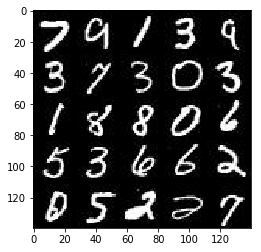

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

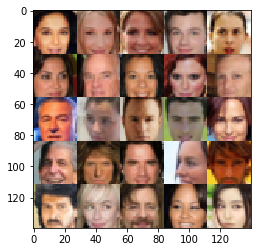

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_images")
    z_data = tf.placeholder(tf.float32, (None, z_dim), name="z_data")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    return input_images, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        # conv 1
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        #leaky ReLu
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x32
        
        # conv 2
        # 7x7x128
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, strides=2, padding='same')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        # conv 3
        # 4x4x256 
        conv3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding='same')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        # Flatten
        flat = tf.reshape(lrelu3, (-1, 4*4*256))
        # Logit
        logits = tf.layers.dense(flat, 1)
        #discriminator output sigmoid(probility output)
        out = tf.sigmoid(logits)

        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:

def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # fully connected layer
        fc = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        fc = tf.reshape(fc, (-1, 7, 7, 512))
        fc = tf.layers.batch_normalization(fc, training=is_train)

        fc = tf.maximum(alpha * fc, fc)
        # 7x7x512 now
        
        deconv2 = tf.layers.conv2d_transpose(fc, 256, 5, strides=2, padding='same')
        deconv2 = tf.layers.batch_normalization(deconv2, training=is_train)
        deconv2 = tf.maximum(alpha * deconv2, deconv2)
        # 14x14x256 now
        
#         deconv3 = tf.layers.conv2d_transpose(deconv2, 128, 5, strides=2, padding='same')
#         deconv3 = tf.layers.batch_normalization(deconv2, training=is_train)
#         deconv3 = tf.maximum(alpha * deconv3, deconv3)
        
        
        # Output layer
        logits = tf.layers.conv2d_transpose(deconv2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
#         print(logits.shape)
        #output Tanh
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='discriminator')):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()


### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print(type(data_image_mode))
    print(data_image_mode)
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images*2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 25
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

<class 'str'>
L
Epoch 0/2... Discriminator Loss: 0.9395... Generator Loss: 0.7865
Epoch 0/2... Discriminator Loss: 1.3615... Generator Loss: 0.4515
Epoch 0/2... Discriminator Loss: 1.7258... Generator Loss: 0.2697
Epoch 0/2... Discriminator Loss: 1.3146... Generator Loss: 0.4338
Epoch 0/2... Discriminator Loss: 0.7407... Generator Loss: 0.9303
Epoch 0/2... Discriminator Loss: 1.2207... Generator Loss: 0.4840
Epoch 0/2... Discriminator Loss: 1.1923... Generator Loss: 0.5058
Epoch 0/2... Discriminator Loss: 1.5444... Generator Loss: 0.3038
Epoch 0/2... Discriminator Loss: 1.3413... Generator Loss: 0.3948


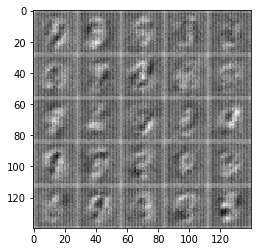

Epoch 0/2... Discriminator Loss: 1.3346... Generator Loss: 0.4320
Epoch 0/2... Discriminator Loss: 1.2830... Generator Loss: 0.4415
Epoch 0/2... Discriminator Loss: 1.2223... Generator Loss: 0.4827
Epoch 0/2... Discriminator Loss: 1.1308... Generator Loss: 0.5611
Epoch 0/2... Discriminator Loss: 1.1323... Generator Loss: 0.5385
Epoch 0/2... Discriminator Loss: 1.2380... Generator Loss: 0.4683
Epoch 0/2... Discriminator Loss: 1.2112... Generator Loss: 0.4752
Epoch 0/2... Discriminator Loss: 1.2125... Generator Loss: 0.4712
Epoch 0/2... Discriminator Loss: 1.1776... Generator Loss: 0.4921
Epoch 0/2... Discriminator Loss: 1.0244... Generator Loss: 0.6504


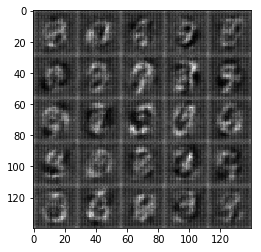

Epoch 0/2... Discriminator Loss: 1.1274... Generator Loss: 0.5270
Epoch 0/2... Discriminator Loss: 1.0185... Generator Loss: 0.6268
Epoch 0/2... Discriminator Loss: 0.9098... Generator Loss: 0.7153
Epoch 0/2... Discriminator Loss: 1.1377... Generator Loss: 0.4873
Epoch 0/2... Discriminator Loss: 1.0251... Generator Loss: 0.6135
Epoch 0/2... Discriminator Loss: 1.0642... Generator Loss: 0.5616
Epoch 0/2... Discriminator Loss: 0.9771... Generator Loss: 0.6302
Epoch 0/2... Discriminator Loss: 0.8687... Generator Loss: 0.7639
Epoch 0/2... Discriminator Loss: 1.0542... Generator Loss: 0.5504
Epoch 0/2... Discriminator Loss: 0.8562... Generator Loss: 0.7551


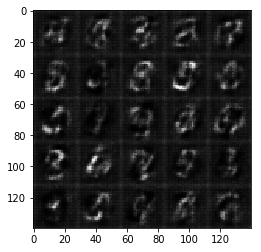

Epoch 0/2... Discriminator Loss: 0.9021... Generator Loss: 0.7099
Epoch 0/2... Discriminator Loss: 0.9663... Generator Loss: 0.6075
Epoch 0/2... Discriminator Loss: 0.9024... Generator Loss: 0.6963
Epoch 0/2... Discriminator Loss: 0.7758... Generator Loss: 1.3282
Epoch 0/2... Discriminator Loss: 0.7667... Generator Loss: 2.0492
Epoch 0/2... Discriminator Loss: 0.9616... Generator Loss: 2.1860
Epoch 0/2... Discriminator Loss: 0.8486... Generator Loss: 2.0018
Epoch 0/2... Discriminator Loss: 0.6536... Generator Loss: 1.3600
Epoch 0/2... Discriminator Loss: 0.8789... Generator Loss: 2.0408
Epoch 0/2... Discriminator Loss: 0.6694... Generator Loss: 1.2105


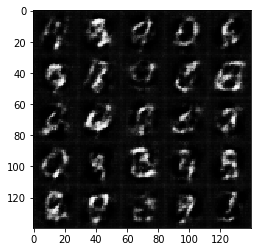

Epoch 0/2... Discriminator Loss: 0.9575... Generator Loss: 0.6023
Epoch 0/2... Discriminator Loss: 0.6561... Generator Loss: 1.1002
Epoch 0/2... Discriminator Loss: 0.8445... Generator Loss: 0.7255
Epoch 0/2... Discriminator Loss: 0.7690... Generator Loss: 0.8340
Epoch 0/2... Discriminator Loss: 1.1023... Generator Loss: 0.5158
Epoch 0/2... Discriminator Loss: 0.8773... Generator Loss: 0.7039
Epoch 0/2... Discriminator Loss: 0.8255... Generator Loss: 0.7864
Epoch 1/2... Discriminator Loss: 0.8116... Generator Loss: 0.8194
Epoch 1/2... Discriminator Loss: 0.8224... Generator Loss: 0.7606
Epoch 1/2... Discriminator Loss: 0.6380... Generator Loss: 1.1083


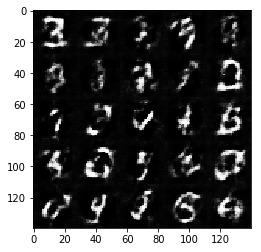

Epoch 1/2... Discriminator Loss: 0.9377... Generator Loss: 0.6814
Epoch 1/2... Discriminator Loss: 0.8625... Generator Loss: 0.7168
Epoch 1/2... Discriminator Loss: 1.0618... Generator Loss: 0.5681
Epoch 1/2... Discriminator Loss: 0.9525... Generator Loss: 0.6818
Epoch 1/2... Discriminator Loss: 0.6830... Generator Loss: 1.0620
Epoch 1/2... Discriminator Loss: 0.6950... Generator Loss: 1.0523
Epoch 1/2... Discriminator Loss: 1.1104... Generator Loss: 0.5393
Epoch 1/2... Discriminator Loss: 0.7087... Generator Loss: 0.9119
Epoch 1/2... Discriminator Loss: 1.1804... Generator Loss: 0.4787
Epoch 1/2... Discriminator Loss: 0.8703... Generator Loss: 0.7753


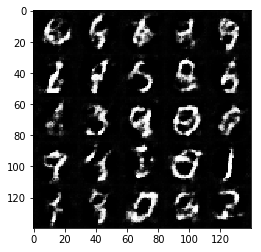

Epoch 1/2... Discriminator Loss: 0.9730... Generator Loss: 0.6578
Epoch 1/2... Discriminator Loss: 1.4444... Generator Loss: 0.3575
Epoch 1/2... Discriminator Loss: 0.8581... Generator Loss: 0.7691
Epoch 1/2... Discriminator Loss: 1.1310... Generator Loss: 0.5008
Epoch 1/2... Discriminator Loss: 0.9360... Generator Loss: 0.6784
Epoch 1/2... Discriminator Loss: 0.8454... Generator Loss: 0.7839
Epoch 1/2... Discriminator Loss: 1.0845... Generator Loss: 0.5243
Epoch 1/2... Discriminator Loss: 1.3279... Generator Loss: 0.4121
Epoch 1/2... Discriminator Loss: 0.8655... Generator Loss: 0.7945
Epoch 1/2... Discriminator Loss: 0.8975... Generator Loss: 0.7101


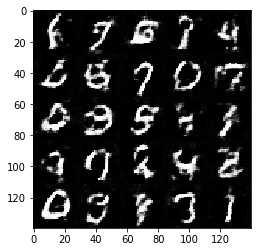

Epoch 1/2... Discriminator Loss: 0.9669... Generator Loss: 0.6372
Epoch 1/2... Discriminator Loss: 1.1030... Generator Loss: 0.5334
Epoch 1/2... Discriminator Loss: 1.1714... Generator Loss: 0.4896
Epoch 1/2... Discriminator Loss: 0.7555... Generator Loss: 1.2140
Epoch 1/2... Discriminator Loss: 0.9014... Generator Loss: 1.8098
Epoch 1/2... Discriminator Loss: 0.7670... Generator Loss: 1.5985
Epoch 1/2... Discriminator Loss: 0.8178... Generator Loss: 1.4173
Epoch 1/2... Discriminator Loss: 0.9863... Generator Loss: 1.5143
Epoch 1/2... Discriminator Loss: 0.8025... Generator Loss: 1.1616
Epoch 1/2... Discriminator Loss: 0.8387... Generator Loss: 0.9472


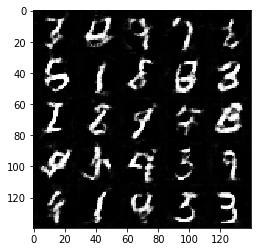

Epoch 1/2... Discriminator Loss: 1.1444... Generator Loss: 0.4865
Epoch 1/2... Discriminator Loss: 0.9664... Generator Loss: 0.8922
Epoch 1/2... Discriminator Loss: 1.0747... Generator Loss: 2.0382
Epoch 1/2... Discriminator Loss: 0.8981... Generator Loss: 1.6319
Epoch 1/2... Discriminator Loss: 0.8096... Generator Loss: 1.4275
Epoch 1/2... Discriminator Loss: 0.7990... Generator Loss: 1.3204
Epoch 1/2... Discriminator Loss: 0.8002... Generator Loss: 1.3461
Epoch 1/2... Discriminator Loss: 0.9435... Generator Loss: 1.6062
Epoch 1/2... Discriminator Loss: 0.8396... Generator Loss: 1.3365
Epoch 1/2... Discriminator Loss: 1.3041... Generator Loss: 0.3944


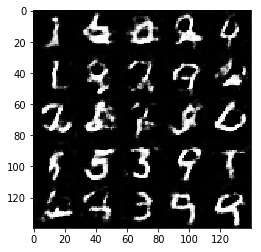

Epoch 1/2... Discriminator Loss: 0.7078... Generator Loss: 1.3073
Epoch 1/2... Discriminator Loss: 1.2782... Generator Loss: 0.4096
Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 0.5993
Epoch 1/2... Discriminator Loss: 0.9166... Generator Loss: 0.7197


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

with tf.Graph().as_default():
    train(epochs, 
          batch_size, z_dim, 
          learning_rate, beta1, 
          mnist_dataset.get_batches,
          mnist_dataset.shape, 
          mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

<class 'str'>
RGB
Epoch 0/1... Discriminator Loss: 0.9308... Generator Loss: 0.9634
Epoch 0/1... Discriminator Loss: 1.0833... Generator Loss: 0.9698
Epoch 0/1... Discriminator Loss: 1.1075... Generator Loss: 0.5655
Epoch 0/1... Discriminator Loss: 2.7326... Generator Loss: 0.0926
Epoch 0/1... Discriminator Loss: 1.2753... Generator Loss: 1.0295
Epoch 0/1... Discriminator Loss: 1.4761... Generator Loss: 0.4832
Epoch 0/1... Discriminator Loss: 1.6802... Generator Loss: 0.3699
Epoch 0/1... Discriminator Loss: 1.3125... Generator Loss: 0.8655
Epoch 0/1... Discriminator Loss: 1.2916... Generator Loss: 0.7738


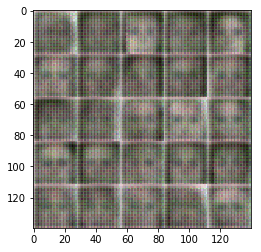

Epoch 0/1... Discriminator Loss: 1.3483... Generator Loss: 0.7564
Epoch 0/1... Discriminator Loss: 1.3376... Generator Loss: 0.5983
Epoch 0/1... Discriminator Loss: 1.5051... Generator Loss: 0.3784
Epoch 0/1... Discriminator Loss: 1.3433... Generator Loss: 0.5643
Epoch 0/1... Discriminator Loss: 1.2453... Generator Loss: 0.6913
Epoch 0/1... Discriminator Loss: 1.0023... Generator Loss: 1.8332
Epoch 0/1... Discriminator Loss: 1.5720... Generator Loss: 0.3544
Epoch 0/1... Discriminator Loss: 1.0132... Generator Loss: 0.6752
Epoch 0/1... Discriminator Loss: 0.6225... Generator Loss: 1.3033
Epoch 0/1... Discriminator Loss: 0.4981... Generator Loss: 2.0815


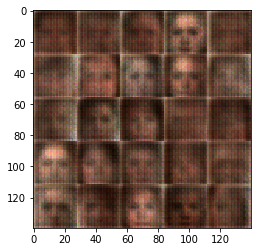

Epoch 0/1... Discriminator Loss: 0.5918... Generator Loss: 1.2651
Epoch 0/1... Discriminator Loss: 0.9482... Generator Loss: 0.7393
Epoch 0/1... Discriminator Loss: 1.1354... Generator Loss: 2.2431
Epoch 0/1... Discriminator Loss: 1.1704... Generator Loss: 0.9298
Epoch 0/1... Discriminator Loss: 1.4202... Generator Loss: 3.1028
Epoch 0/1... Discriminator Loss: 0.9987... Generator Loss: 1.1286
Epoch 0/1... Discriminator Loss: 1.4280... Generator Loss: 1.2286
Epoch 0/1... Discriminator Loss: 1.5337... Generator Loss: 0.4104
Epoch 0/1... Discriminator Loss: 1.8603... Generator Loss: 0.2722
Epoch 0/1... Discriminator Loss: 1.1922... Generator Loss: 1.5866


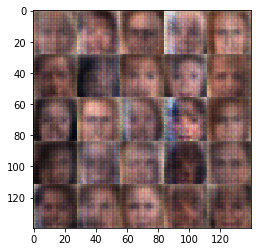

Epoch 0/1... Discriminator Loss: 1.4782... Generator Loss: 0.4373
Epoch 0/1... Discriminator Loss: 1.0881... Generator Loss: 0.8902
Epoch 0/1... Discriminator Loss: 1.5007... Generator Loss: 0.5296
Epoch 0/1... Discriminator Loss: 1.2586... Generator Loss: 0.7865
Epoch 0/1... Discriminator Loss: 1.2139... Generator Loss: 0.9045
Epoch 0/1... Discriminator Loss: 1.6277... Generator Loss: 0.6805
Epoch 0/1... Discriminator Loss: 1.2831... Generator Loss: 0.8768
Epoch 0/1... Discriminator Loss: 1.3444... Generator Loss: 0.6543
Epoch 0/1... Discriminator Loss: 1.2503... Generator Loss: 0.6521
Epoch 0/1... Discriminator Loss: 1.3956... Generator Loss: 0.5718


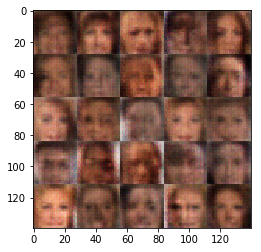

Epoch 0/1... Discriminator Loss: 1.2849... Generator Loss: 0.7050
Epoch 0/1... Discriminator Loss: 1.3673... Generator Loss: 0.5765
Epoch 0/1... Discriminator Loss: 1.4488... Generator Loss: 0.7921
Epoch 0/1... Discriminator Loss: 1.2263... Generator Loss: 0.8907
Epoch 0/1... Discriminator Loss: 1.4407... Generator Loss: 0.8176
Epoch 0/1... Discriminator Loss: 1.3980... Generator Loss: 0.9130
Epoch 0/1... Discriminator Loss: 1.2909... Generator Loss: 0.7023
Epoch 0/1... Discriminator Loss: 1.2770... Generator Loss: 0.6620
Epoch 0/1... Discriminator Loss: 1.4240... Generator Loss: 0.6433
Epoch 0/1... Discriminator Loss: 1.3073... Generator Loss: 0.9380


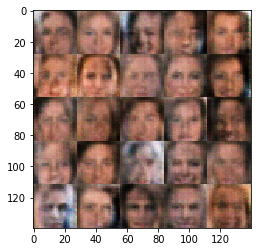

Epoch 0/1... Discriminator Loss: 1.2360... Generator Loss: 0.8064
Epoch 0/1... Discriminator Loss: 1.3185... Generator Loss: 0.8739
Epoch 0/1... Discriminator Loss: 1.3688... Generator Loss: 0.6843
Epoch 0/1... Discriminator Loss: 1.2925... Generator Loss: 0.6102
Epoch 0/1... Discriminator Loss: 1.2914... Generator Loss: 0.8957
Epoch 0/1... Discriminator Loss: 1.1406... Generator Loss: 0.8927
Epoch 0/1... Discriminator Loss: 1.2256... Generator Loss: 0.9575
Epoch 0/1... Discriminator Loss: 1.1789... Generator Loss: 0.7844
Epoch 0/1... Discriminator Loss: 1.1887... Generator Loss: 0.9541
Epoch 0/1... Discriminator Loss: 1.5071... Generator Loss: 0.4412


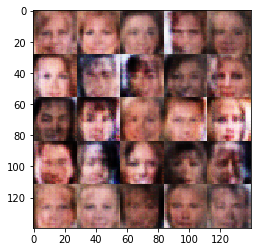

Epoch 0/1... Discriminator Loss: 1.1976... Generator Loss: 0.7164
Epoch 0/1... Discriminator Loss: 1.1837... Generator Loss: 0.8493
Epoch 0/1... Discriminator Loss: 1.1948... Generator Loss: 1.0828
Epoch 0/1... Discriminator Loss: 1.2530... Generator Loss: 0.8706
Epoch 0/1... Discriminator Loss: 1.2631... Generator Loss: 0.8426
Epoch 0/1... Discriminator Loss: 1.2706... Generator Loss: 0.8152
Epoch 0/1... Discriminator Loss: 1.1864... Generator Loss: 0.8986
Epoch 0/1... Discriminator Loss: 1.2732... Generator Loss: 0.5466
Epoch 0/1... Discriminator Loss: 1.3534... Generator Loss: 1.0383
Epoch 0/1... Discriminator Loss: 1.3258... Generator Loss: 0.5467


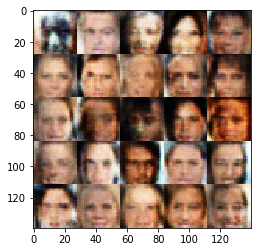

Epoch 0/1... Discriminator Loss: 1.1575... Generator Loss: 1.3051
Epoch 0/1... Discriminator Loss: 1.1442... Generator Loss: 1.0746
Epoch 0/1... Discriminator Loss: 1.2596... Generator Loss: 0.7164
Epoch 0/1... Discriminator Loss: 1.2511... Generator Loss: 1.1235
Epoch 0/1... Discriminator Loss: 1.3513... Generator Loss: 0.7764
Epoch 0/1... Discriminator Loss: 1.0317... Generator Loss: 1.0082
Epoch 0/1... Discriminator Loss: 1.1532... Generator Loss: 0.7159
Epoch 0/1... Discriminator Loss: 1.0678... Generator Loss: 0.8944
Epoch 0/1... Discriminator Loss: 1.1685... Generator Loss: 0.6355
Epoch 0/1... Discriminator Loss: 1.2183... Generator Loss: 1.8702


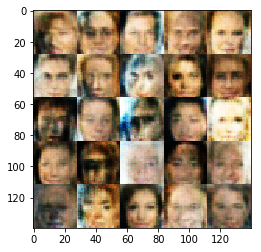

Epoch 0/1... Discriminator Loss: 1.1360... Generator Loss: 1.2778
Epoch 0/1... Discriminator Loss: 1.4832... Generator Loss: 0.3503
Epoch 0/1... Discriminator Loss: 1.2608... Generator Loss: 2.6364
Epoch 0/1... Discriminator Loss: 1.2477... Generator Loss: 0.5725
Epoch 0/1... Discriminator Loss: 1.1081... Generator Loss: 1.8161
Epoch 0/1... Discriminator Loss: 1.0725... Generator Loss: 1.1345
Epoch 0/1... Discriminator Loss: 0.9164... Generator Loss: 1.3791
Epoch 0/1... Discriminator Loss: 1.5250... Generator Loss: 0.3911
Epoch 0/1... Discriminator Loss: 0.7559... Generator Loss: 1.9863
Epoch 0/1... Discriminator Loss: 0.9315... Generator Loss: 1.0299


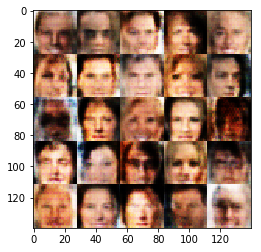

Epoch 0/1... Discriminator Loss: 0.7829... Generator Loss: 0.9137
Epoch 0/1... Discriminator Loss: 0.5790... Generator Loss: 1.6819
Epoch 0/1... Discriminator Loss: 0.7381... Generator Loss: 2.1017
Epoch 0/1... Discriminator Loss: 1.0729... Generator Loss: 3.1319
Epoch 0/1... Discriminator Loss: 0.5378... Generator Loss: 1.7947
Epoch 0/1... Discriminator Loss: 0.9580... Generator Loss: 0.7135
Epoch 0/1... Discriminator Loss: 1.3464... Generator Loss: 0.4525
Epoch 0/1... Discriminator Loss: 1.0363... Generator Loss: 0.8733
Epoch 0/1... Discriminator Loss: 0.9195... Generator Loss: 0.8144
Epoch 0/1... Discriminator Loss: 0.9863... Generator Loss: 1.1899


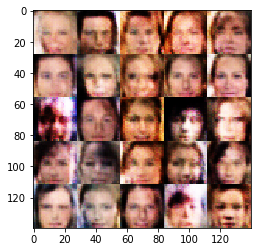

Epoch 0/1... Discriminator Loss: 1.3633... Generator Loss: 0.4240
Epoch 0/1... Discriminator Loss: 1.4954... Generator Loss: 0.3743
Epoch 0/1... Discriminator Loss: 0.6665... Generator Loss: 1.4172
Epoch 0/1... Discriminator Loss: 0.7008... Generator Loss: 1.1554
Epoch 0/1... Discriminator Loss: 1.1149... Generator Loss: 0.5433
Epoch 0/1... Discriminator Loss: 0.4908... Generator Loss: 1.4128
Epoch 0/1... Discriminator Loss: 2.2401... Generator Loss: 0.1453
Epoch 0/1... Discriminator Loss: 0.9215... Generator Loss: 0.9795
Epoch 0/1... Discriminator Loss: 0.3212... Generator Loss: 2.4480
Epoch 0/1... Discriminator Loss: 0.5902... Generator Loss: 1.4418


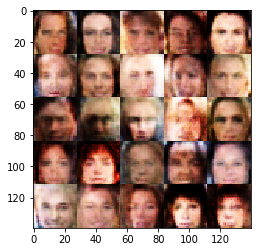

Epoch 0/1... Discriminator Loss: 0.9837... Generator Loss: 0.6257
Epoch 0/1... Discriminator Loss: 1.3642... Generator Loss: 0.4500
Epoch 0/1... Discriminator Loss: 0.6087... Generator Loss: 2.3535
Epoch 0/1... Discriminator Loss: 1.5405... Generator Loss: 3.4228
Epoch 0/1... Discriminator Loss: 0.8794... Generator Loss: 2.0389
Epoch 0/1... Discriminator Loss: 1.1655... Generator Loss: 0.5494
Epoch 0/1... Discriminator Loss: 0.3244... Generator Loss: 4.2850
Epoch 0/1... Discriminator Loss: 0.6510... Generator Loss: 3.3254
Epoch 0/1... Discriminator Loss: 0.6703... Generator Loss: 2.1466
Epoch 0/1... Discriminator Loss: 0.7201... Generator Loss: 1.5807


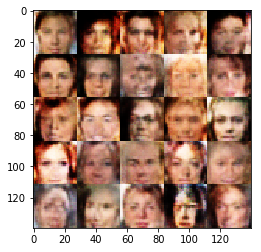

Epoch 0/1... Discriminator Loss: 1.4538... Generator Loss: 0.4018
Epoch 0/1... Discriminator Loss: 0.6057... Generator Loss: 2.9188
Epoch 0/1... Discriminator Loss: 1.0439... Generator Loss: 0.5852
Epoch 0/1... Discriminator Loss: 0.7361... Generator Loss: 1.7331
Epoch 0/1... Discriminator Loss: 1.2456... Generator Loss: 2.1289
Epoch 0/1... Discriminator Loss: 0.9105... Generator Loss: 0.8271
Epoch 0/1... Discriminator Loss: 0.6711... Generator Loss: 1.4706
Epoch 0/1... Discriminator Loss: 0.9991... Generator Loss: 2.3393
Epoch 0/1... Discriminator Loss: 1.1504... Generator Loss: 1.7730
Epoch 0/1... Discriminator Loss: 1.3520... Generator Loss: 0.4313


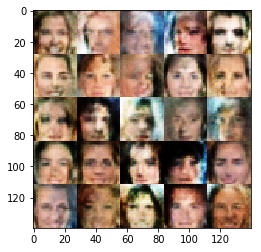

Epoch 0/1... Discriminator Loss: 0.4858... Generator Loss: 1.8584
Epoch 0/1... Discriminator Loss: 1.3784... Generator Loss: 0.3920
Epoch 0/1... Discriminator Loss: 1.2920... Generator Loss: 1.2930
Epoch 0/1... Discriminator Loss: 1.2637... Generator Loss: 1.1600
Epoch 0/1... Discriminator Loss: 1.3982... Generator Loss: 0.4339
Epoch 0/1... Discriminator Loss: 1.3237... Generator Loss: 0.8654
Epoch 0/1... Discriminator Loss: 0.8745... Generator Loss: 1.7843
Epoch 0/1... Discriminator Loss: 0.7718... Generator Loss: 0.9869
Epoch 0/1... Discriminator Loss: 1.2473... Generator Loss: 1.1395
Epoch 0/1... Discriminator Loss: 0.9120... Generator Loss: 2.0115


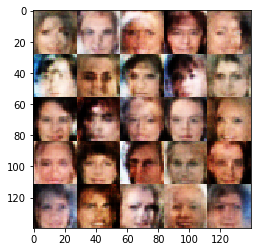

Epoch 0/1... Discriminator Loss: 1.1106... Generator Loss: 0.5697
Epoch 0/1... Discriminator Loss: 1.4976... Generator Loss: 0.3298
Epoch 0/1... Discriminator Loss: 1.1415... Generator Loss: 0.9384
Epoch 0/1... Discriminator Loss: 1.4324... Generator Loss: 0.4877
Epoch 0/1... Discriminator Loss: 1.3626... Generator Loss: 0.6549
Epoch 0/1... Discriminator Loss: 1.0995... Generator Loss: 0.6344
Epoch 0/1... Discriminator Loss: 1.3874... Generator Loss: 0.4183
Epoch 0/1... Discriminator Loss: 0.9136... Generator Loss: 1.3933
Epoch 0/1... Discriminator Loss: 1.4989... Generator Loss: 0.3405
Epoch 0/1... Discriminator Loss: 0.6200... Generator Loss: 1.3442


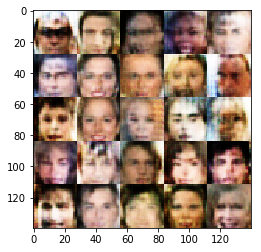

Epoch 0/1... Discriminator Loss: 0.8441... Generator Loss: 1.2206
Epoch 0/1... Discriminator Loss: 0.5846... Generator Loss: 2.6367
Epoch 0/1... Discriminator Loss: 1.2033... Generator Loss: 0.7126
Epoch 0/1... Discriminator Loss: 1.1345... Generator Loss: 0.7230
Epoch 0/1... Discriminator Loss: 0.9027... Generator Loss: 1.1364
Epoch 0/1... Discriminator Loss: 1.0254... Generator Loss: 0.7736
Epoch 0/1... Discriminator Loss: 0.8883... Generator Loss: 0.9418


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.